In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix




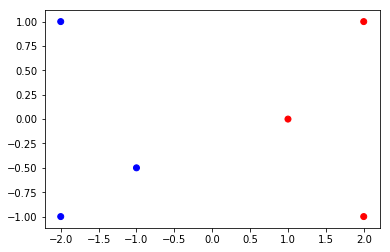

In [114]:
X=np.array([[1,2,2,-1,-2,-2],[0,1,-1,-.5,1,-1]])
Y=np.array([[1],[1],[1],[-1],[-1],[-1]])
c=[]
for item in Y:
    if item==1:
        c.append('red')
    else:
        c.append('blue')
plt.scatter(X[0,:],X[1,:],c=c)
plt.show()

In [119]:
m,n= X.shape
C=1
A1=np.zeros((6,6))
for i in range(n):
    for j in range(n):
        A1[i,j]=np.matmul(X[:,i].T,X[:,j])
A1=A1+(1/C)*np.identity(6)
for i in range(n):
    for j in range(n):
        A1[i,j]=Y[i]*Y[j]*A1[i,j]
Aineq=matrix(-1*np.identity(6))
bineq=matrix(np.zeros((6,1)))

In [120]:
f=-1*np.ones((6,1))
Aeq=matrix(Y.T,tc='d')
beq=matrix(np.array([[0]]),tc="d")
beq


<1x1 matrix, tc='d'>

In [121]:
from cvxopt import solvers
sol = solvers.qp(matrix(A1,tc='d'),matrix(f,tc='d'),Aineq,bineq,Aeq,beq)




     pcost       dcost       gap    pres   dres
 0: -3.0856e-01 -8.0451e-01  8e+00  3e+00  1e+00
 1: -1.8612e-01 -7.2326e-01  5e-01  2e-16  3e-16
 2: -3.0142e-01 -3.4614e-01  4e-02  1e-16  3e-16
 3: -3.1732e-01 -3.2071e-01  3e-03  1e-16  1e-16
 4: -3.1978e-01 -3.2001e-01  2e-04  9e-17  1e-16
 5: -3.2000e-01 -3.2000e-01  4e-06  5e-17  2e-16
 6: -3.2000e-01 -3.2000e-01  4e-08  1e-16  2e-16
Optimal solution found.


In [122]:
alpha=np.array(sol['x'])
w=np.zeros((1,2))
for i in range(n):
    w=w+alpha[i]*Y[i]*X[:,i]

w=w.T

In [123]:
xx=np.where(alpha.T[0]>.1)

for item in xx[0]:
    if Y[item]<0:
        x_mines=X[:,item]
    if Y[item]>0:
        x_plus=X[:,item]
b=(-0.5)*np.dot(w.T,(x_plus+x_mines))



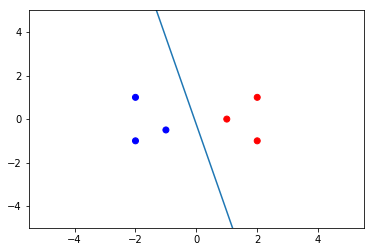

In [124]:
x1=np.linspace(-5,5,200)
x2=-(w[0]/w[1])*x1-b/(w[1])
plt.scatter(X[0,:],X[1,:],c=c)
plt.plot(x1,x2,)
plt.ylim([-5, 5])
plt.show()

In [ ]:
print(Aineq)
print(f)
print(H)
print(bineq)

In [ ]:
from cvxopt import solvers
sol = solvers.qp(H,f,Aineq,bineq)
print(sol['x'])


In [ ]:
w=sol['x'][0:2]
w=np.array(w)
